<a href="https://colab.research.google.com/github/1970332/IAyRN/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 6: Redes neuronales.

Andy Alexander López Ovalle 1970332 Hora: N4 a N6

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1281 - accuracy: 0.9607 - val_loss: 0.0428 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0361 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0227 - val_accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0287 - accuracy: 0.9910
Exactitud del modelo en datos de prueba: 0.9909999966621399
1/1 [==============================] - 0s 17ms/step


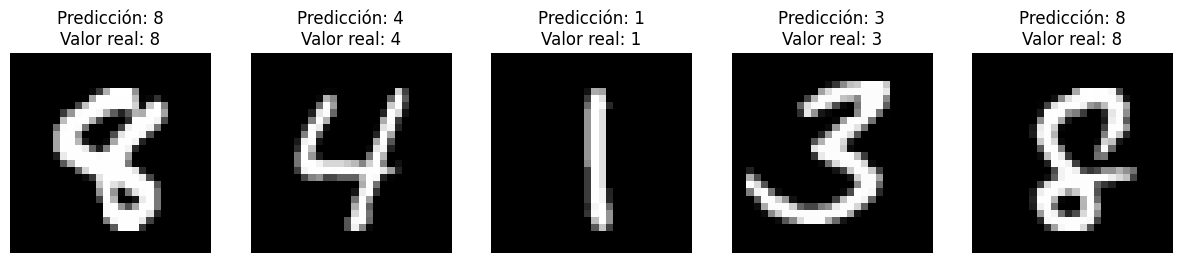

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Carga al conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

# Definir la estructura de la red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)

# Realizar predicciones y mostrar las imágenes
num_predicciones = 5
indices_aleatorios = np.random.choice(test_data.shape[0], num_predicciones, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(1, num_predicciones, i + 1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Realizar la predicción
    prediction = model.predict(np.expand_dims(test_data[idx], axis=0))
    predicted_label = np.argmax(prediction)
    actual_label = test_labels[idx]
    plt.title(f"Predicción: {predicted_label}\nValor real: {actual_label}")

plt.show()


Responiendo las preguntas

# ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

Usé 5 épocas tanto para la red neuronal prealimentada como para la red neuronal convolucional. Sin embargo, en la práctica, el número de épocas puede ajustarse según el rendimiento que se observe durante la validación y los recursos computacionales que tengamos disponibles. A menudo, una CNN puede beneficiarse de más épocas de entrenamiento para mejorar su rendimiento.

# ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

Obtuve un mejor rendimiento con el modelo de la actividad 6, era mas rapido en respuesta y mas preciso, investigando un poco pude descubrir que el modelo de red neuronal convolucional (CNN) tiene mejor rendimiento en la clasificación de imágenes comparado con la red neuronal prealimentada. Esto es porque las CNN pueden captar características espaciales y patrones locales en las imágenes gracias a sus capas convolucionales y de pooling, lo cual es muy útil para tareas de visión por computadora.